INFO:main:

 processing image 	 dataset/images_test/yes1_72.PNG
DEBUG:main:Resized template 'template_yes.PNG' to (141, 73)


dataset/images_test


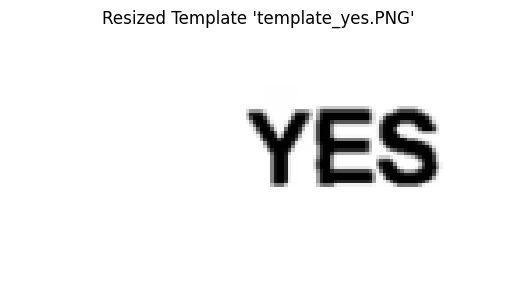

DEBUG:main:Resized template 'template_yes_2.PNG' to (141, 70)


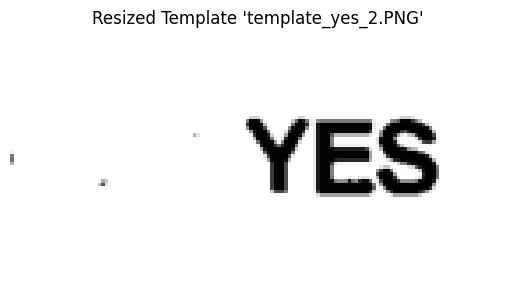

DEBUG:main:Resized template 'template_yes_3.PNG' to (141, 74)


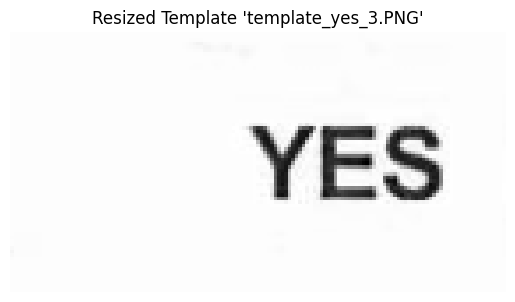

DEBUG:main:Resized template 'template_no.PNG' to (127, 75)


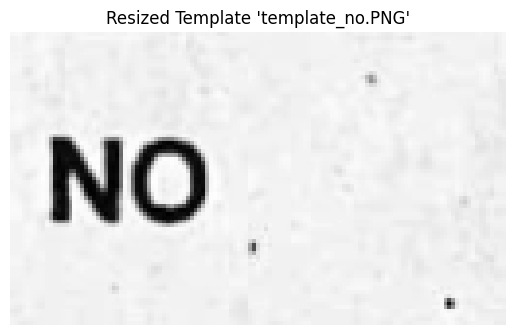

DEBUG:main:Resized template 'template_no_2.PNG' to (129, 75)


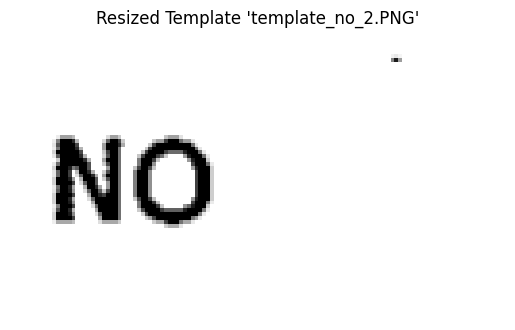

DEBUG:main:Resized template 'template_no_3.PNG' to (130, 75)


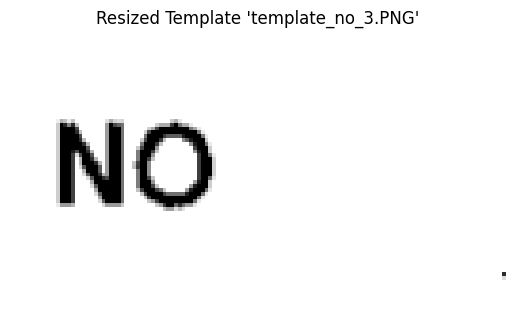

DEBUG:main:Resized template 'template_no_4.PNG' to (129, 75)


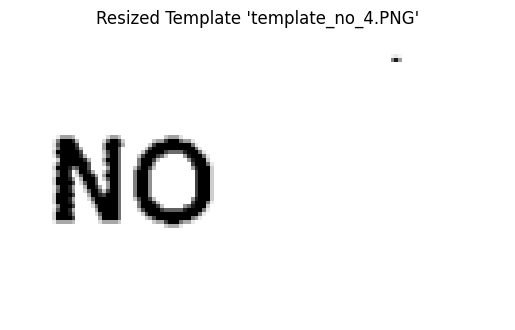

DEBUG:main:Resized template 'template_no_5.PNG' to (132, 75)


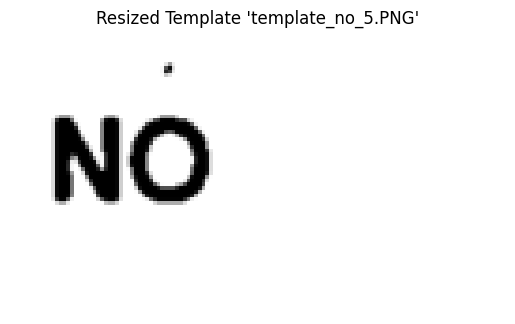

DEBUG:main:Best match with template 'template_yes.PNG' match value: 0.22803305089473724


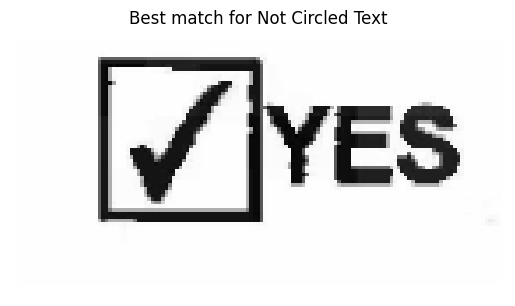

DEBUG:main:Resized template 'template_yes_check_6.PNG' to (141, 70)


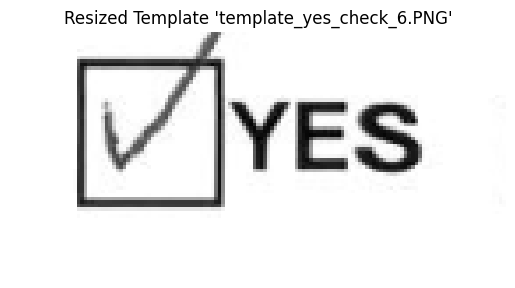

DEBUG:main:Resized template 'template_yes_check_5.PNG' to (138, 75)


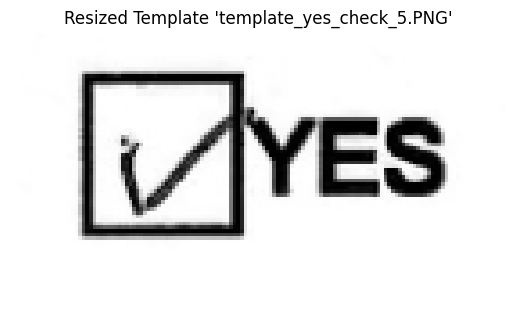

DEBUG:main:Resized template 'template_yes_check_4.PNG' to (141, 70)


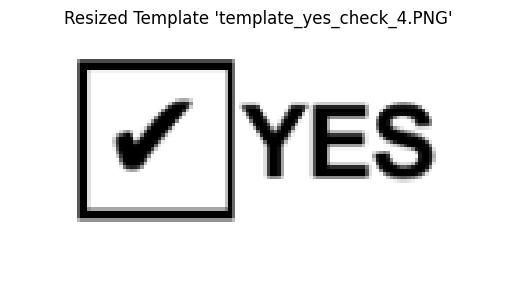

DEBUG:main:Resized template 'template_yes_check_2.PNG' to (141, 70)


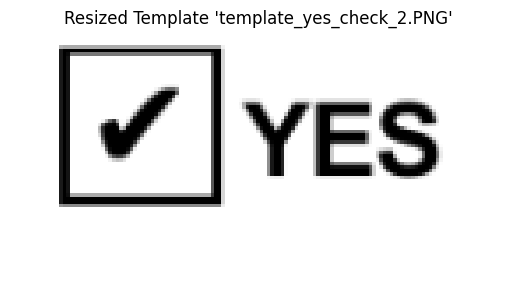

DEBUG:main:Resized template 'template_yes_check_3.PNG' to (141, 70)


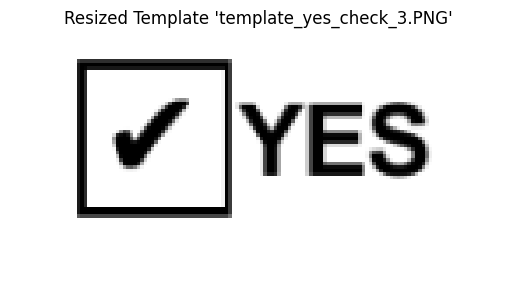

DEBUG:main:Resized template 'template_yes_check.PNG' to (141, 71)


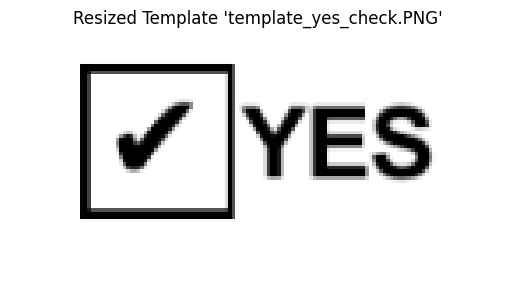

DEBUG:main:Resized template 'template_no_check.PNG' to (133, 75)


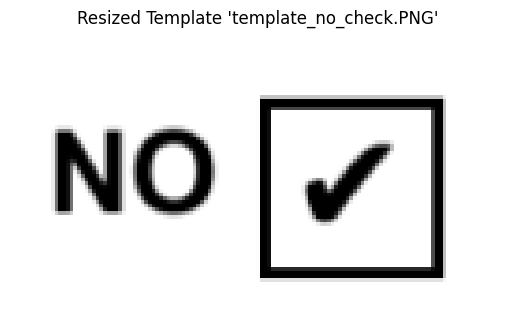

DEBUG:main:Resized template 'template_yes_check_hand.PNG' to (137, 75)


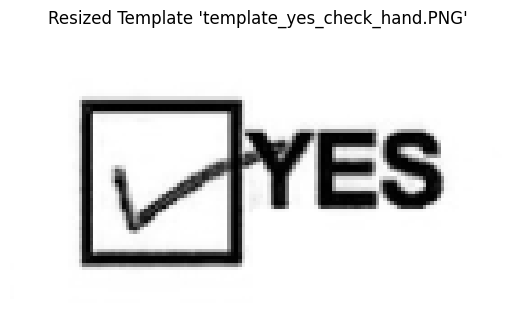

DEBUG:main:Resized template 'template_no_check_hand.PNG' to (130, 75)


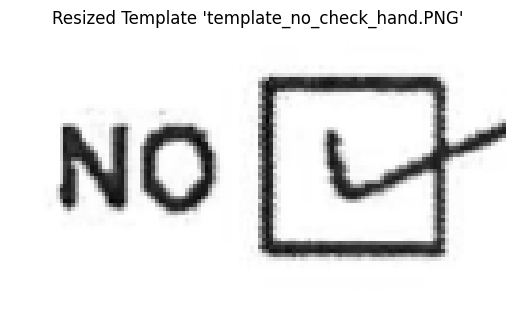

DEBUG:main:Resized template 'template_no_check_hand_2.PNG' to (135, 75)


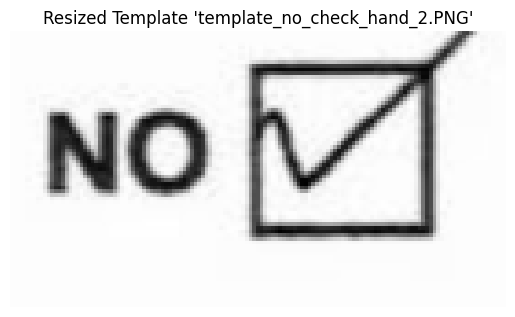

DEBUG:main:Best match with template 'template_yes_check_4.PNG' match value: 0.29534387588500977


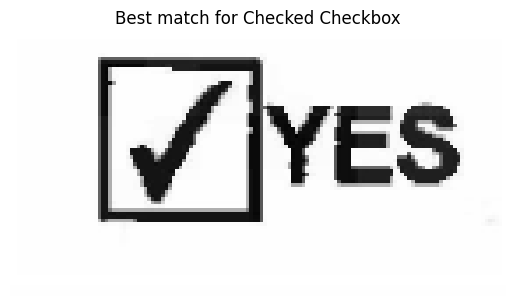

DEBUG:main:Resized template 'template_yes_uncheck.PNG' to (141, 70)


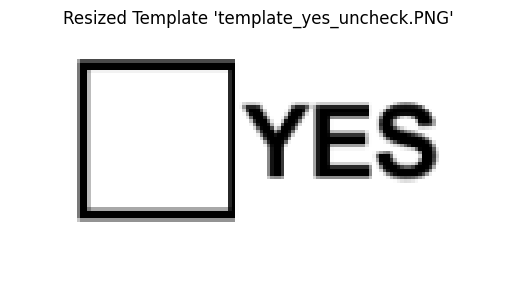

DEBUG:main:Resized template 'template_yes_uncheck_2.PNG' to (141, 71)


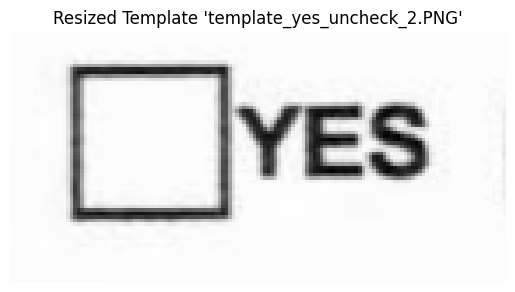

DEBUG:main:Resized template 'template_yes_uncheck_3.PNG' to (141, 74)


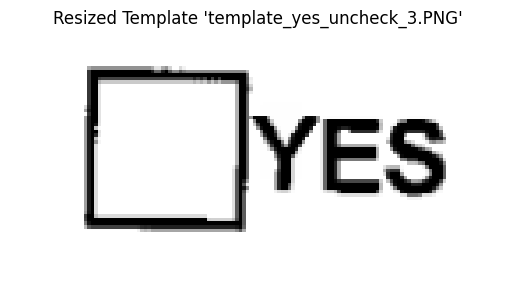

DEBUG:main:Resized template 'template_yes_uncheck_4.PNG' to (141, 74)


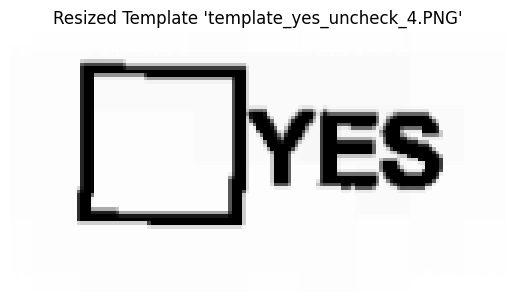

DEBUG:main:Resized template 'template_yes_uncheck_5.PNG' to (141, 72)


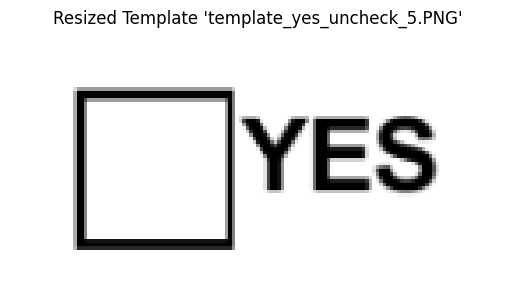

DEBUG:main:Resized template 'template_no_uncheck.PNG' to (132, 75)


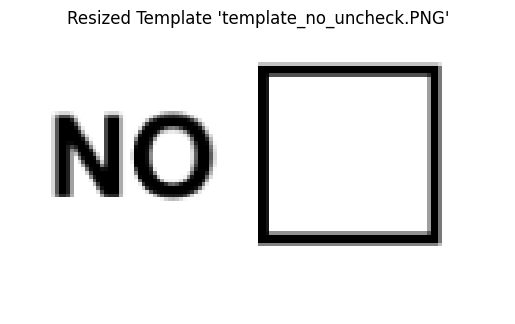

DEBUG:main:Resized template 'template_no_uncheck_4.PNG' to (133, 75)


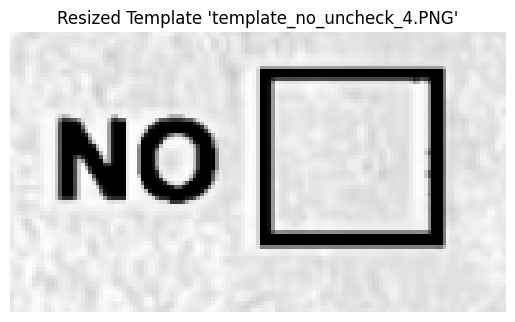

DEBUG:main:Resized template 'template_no_uncheck_5.PNG' to (133, 75)


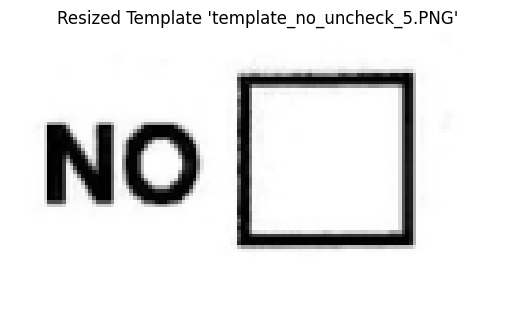

DEBUG:main:Best match with template 'template_yes_uncheck.PNG' match value: 0.3074913024902344


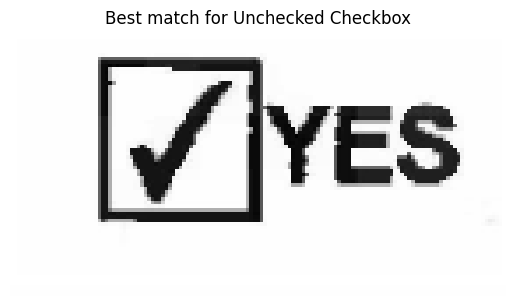

DEBUG:main:Circles detected: 1
DEBUG:main:Circles detected with centre at (54, 35) and radius 17


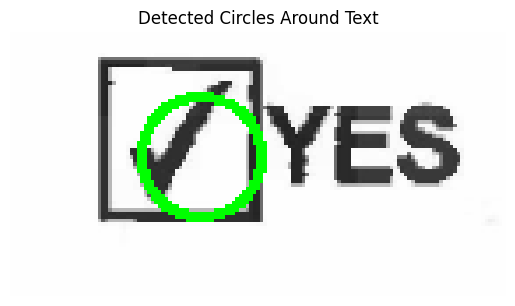

INFO:main:{'confidence': 80, 'final_result': True, 'test_performed': 'circled', 'all_attempts': {'not_circled': {'detected': False, 'confidence': 22.803305089473724, 'test': 'Text not circled using templates'}, 'checkbox_checked': {'detected': False, 'confidence': 29.534387588500977, 'test': 'Checkbox checked using templates'}, 'checkbox_unchecked': {'detected': False, 'confidence': 30.749130249023438, 'test': 'Checkbox unchecked using templates'}, 'circled': {'detected': True, 'confidence': 80, 'test': 'Text circled detection'}, 'tick_marks': {'detected': False, 'confidence': 0, 'test': 'Tick marks in checkbox area'}}}
INFO:main:Annotated image saved to results/yes1_72_annotated.png


In [85]:
import importlib
import main
import os
importlib.reload(main)
from main import *
folder = "dataset/images_test"


def list_files_in_folder(folder_path, ext=None):
    """
    Returns a list of file names in the given folder, optionally filtering by extension.
    
    Parameters:
        folder_path (str): The path to the folder.
        ext (str, optional): The file extension to filter by (e.g., 'png'). Defaults to None.
        
    Returns:
        list: A list of file names matching the extension.
    """
    try:
        # List all files in the directory
        files = [
            f for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f))
        ]
        
        if ext is not None:
            # Normalize the extension to lowercase
            ext = ext.lower()
            # Filter files by extension (case-insensitive)
            files = [
                f for f in files
                if os.path.splitext(f)[1].lower() == f'.{ext}'
            ]
        
        return files
    
    except FileNotFoundError:
        print(f"The folder '{folder_path}' does not exist.")
        return []
    except PermissionError:
        print(f"Permission denied to access '{folder_path}'.")
        return []
    



threshold = 60  # Set your desired threshold


 
image_paths = list_files_in_folder(folder,ext="PNG")

print(folder)
for file_name in image_paths:
    full_file_path = os.path.join(folder, file_name)

    filename = full_file_path.split("/")[-1]
    name = filename.split(".")[0]
    unique_strings = [
    # "no1_93",
    # "no1_86",
    # "yes1_2",
    # "no1_96",
    # "no1_97",
    # "yes1_79",
    # "yes1_71",
    "yes1_72",
    # "yes1_76",
    # "no1_27",
    # "no1_2",
    # "no4",
    # "no1_71",
    # "yes1_60",
    # "no1_22"
]
    
    if name  in unique_strings:
    # if name  in unique_strings or 1:
    # break   

        result_payload = process_image(full_file_path, threshold=threshold, show_plots=True, align=False, allow_resize=True)
        LOGGER.info(result_payload)



        # Save the resulting images with green or red text
        output_directory = 'results'
        file_name_prefix = os.path.splitext(os.path.basename(filename))[0]  # Use the original file name as prefix
        image = cv2.imread(full_file_path)
        annotated_image_path = annotate_image(
            image=image,
            result_payload=result_payload,
            output_path=output_directory,
            file_name_prefix=file_name_prefix,
        )

        

In [83]:
# epsilon_values = [0.01, 0.02, 0.03, 0.05]

# for epsilon_multiplier in epsilon_values:
#     print(f"\nTesting with epsilon_multiplier = {epsilon_multiplier}")
#     tick_detected, detection_info = detect_checkbox_with_tick(
#         gray,
#         area_threshold=100,
#         epsilon_multiplier=epsilon_multiplier,
#         debug=True,
#         show_plots=True
#     )

In [84]:
# param_ranges = {
#     'clahe_clip_limits': [1.0, 1.5, 2.0],
#     'tile_grid_sizes': [(4, 4), (8, 8)],
#     'block_sizes': [15, 21, 31],  # Must be odd numbers
#     'C_values': [2, 3, 5],
#     'area_thresholds': [50, 100, 200]
# }
# full_file_path = "dataset/images_test/no1_93.PNG"
# explore_detection_parameters(full_file_path, param_ranges)